
## Exploratory Data Analysis (EDA) of Viking Artifacts Dataset

This notebook presents an exploratory data analysis of a dataset containing information about Viking artifacts.


The questions I want to explore are: 
1. Where were these artifacts found?
2. What durable materials did Scandinavians use in the Viking Age?
3. What types of weapons did Vikings use in raiding?
4. When were these artifacts uncovered?

In [35]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [36]:

# Load the dataset
war_dataset = pd.read_csv('/Users/aly.milne/Library/CloudStorage/OneDrive-BrighamYoungUniversity/Fall 2023/STAT 386/ST386_Final_Project/Scraped_Data/war_translated.csv')
trade_dataset = pd.read_csv('/Users/aly.milne/Library/CloudStorage/OneDrive-BrighamYoungUniversity/Fall 2023/STAT 386/ST386_Final_Project/Scraped_Data/trade_translated.csv')



### Basic Overview of the War Dataset


In [37]:
# The regular expression '\d+' extracts one or more digits
war_dataset['Era Start Year'] = war_dataset['Era Start Year'].str.extract('(\d+)')

# Convert the extracted numbers to a numeric datatype
war_dataset['Era Start Year'] = pd.to_numeric(war_dataset['Era Start Year'])

# Step 1: Select non-object columns
non_object_columns = list(war_dataset.select_dtypes(exclude=['object']).columns)


# Step 2: Select object columns that end with '_Translated'
object_translated_columns = list(war_dataset.select_dtypes(include=['object']).filter(like='_translated').columns)
additional_columns = ["Unique Name", "Museum", ]  # Replace with your column names
object_translated_columns.extend(additional_columns)


# Step 3: Combine both lists using list concatenation
final_columns = non_object_columns + object_translated_columns

# Step 4: Select these columns from the dataframe
war_df = war_dataset[final_columns]

In [38]:
# The regular expression '\d+' extracts one or more digits
# trade_dataset['Era Start Year'] = trade_dataset['Era Start Year'].str.extract('(\d+)')

# Convert the extracted numbers to a numeric datatype
trade_dataset['Era Start Year'] = pd.to_numeric(trade_dataset['Era Start Year'])

# Step 1: Select non-object columns
non_object_columns = list(trade_dataset.select_dtypes(exclude=['object']).columns)

# Step 2: Select object columns that end with '_Translated'
object_translated_columns = list(trade_dataset.select_dtypes(include=['object']).filter(like='_translated').columns)
additional_columns = ["Unique Name", "Museum", ]  # Replace with your column names
object_translated_columns.extend(additional_columns)


# Step 3: Combine both lists using list concatenation
final_columns = non_object_columns + object_translated_columns

# Step 4: Select these columns from the dataframe
trade_df = trade_dataset[final_columns]

In [39]:
trade_basic_overview = {
    "Number of Rows": trade_df.shape[0],
    "Number of Columns": trade_df.shape[1],
    "Data Types": trade_df.dtypes
}
trade_basic_overview

{'Number of Rows': 256,
 'Number of Columns': 41,
 'Data Types': Förvärvsnr.                       float64
 Antal                             float64
 Förvärvsnummer                    float64
 Förvärvsdatum                     float64
 latitude                          float64
 longitude                         float64
 historisk_plats_latitude          float64
 historisk_plats_longitude         float64
 Era Start Year                      int64
 Era End Year                        int64
 Width                             float64
 Length                            float64
 Thickness                         float64
 Diameter                          float64
 Weight                            float64
 Föremålsbenämning_translated       object
 Föremålsnr._translated             object
 Andra nummer_translated            object
 Material_translated                object
 Plats_translated                   object
 Fornlämning_translated             object
 Socken_translated               

In [40]:

war_basic_overview = {
    "Number of Rows": war_df.shape[0],
    "Number of Columns": war_df.shape[1],
    "Data Types": war_df.dtypes
}
war_basic_overview


{'Number of Rows': 464,
 'Number of Columns': 42,
 'Data Types': Förvärvsnr.                       float64
 Antal                             float64
 Förvärvsnummer                    float64
 Förvärvsdatum                     float64
 Antal fragment                    float64
 plats_latitude                    float64
 plats_longitude                   float64
 historisk_plats_latitude          float64
 historisk_plats_longitude         float64
 Era Start Year                    float64
 Era End Year                      float64
 Width                             float64
 Length                            float64
 Thickness                         float64
 Diameter                          float64
 Weight                            float64
 Föremålsbenämning_translated       object
 Föremålsnr._translated             object
 Andra nummer_translated            object
 Material_translated                object
 Plats_translated                   object
 Fornlämning_translated          


### Summary Statistics and Missing Values Analysis


In [41]:
# Summary Statistics for Numerical Data
war_numerical_summary = war_df.describe()

war_numerical_summary

,Förvärvsnr.,Antal,Förvärvsnummer,Förvärvsdatum,Antal fragment,plats_latitude,plats_longitude,historisk_plats_latitude,historisk_plats_longitude,Era Start Year,Era End Year,Width,Length,Thickness,Diameter,Weight
count,458.000000,436.000000,458.000000,458.000000,192.000000,118.000000,118.000000,1.510000e+02,1.510000e+02,463.000000,463.000000,69.000000,125.000000,33.000000,8.000000,76.000000
mean,26689.157205,1.793578,26689.157205,1967.421397,7.979167,55.380302,13.870239,4.631448e+01,1.104803e+01,796.652268,1106.911447,87.202899,174.128000,18.484848,76.750000,145.750000
std,10882.315019,3.355360,10882.315019,49.776429,10.984024,9.629321,14.260717,1.853559e-13,4.099217e-14,29.325425,45.533950,279.242493,212.849598,43.992983,71.858492,323.715765
min,432.000000,1.000000,432.000000,1820.000000,1.000000,-5.220006,-71.800061,4.631448e+01,1.104803e+01,500.000000,1100.000000,5.000000,13.000000,1.000000,4.000000,1.000000
25%,17343.000000,1.000000,17343.000000,1923.000000,1.000000,46.314475,11.048029,4.631448e+01,1.104803e+01,800.000000,1100.000000,10.000000,68.000000,4.000000,11.750000,3.000000
50%,34000.000000,1.000000,34000.000000,2000.000000,3.000000,58.050810,16.093554,4.631448e+01,1.104803e+01,800.000000,1100.000000,20.000000,91.000000,10.000000,74.500000,11.000000
75%,34000.000000,1.000000,34000.000000,2000.000000,10.250000,60.317277,18.239923,4.631448e+01,1.104803e+01,800.000000,1100.000000,80.000000,150.000000,16.000000,142.500000,54.500000
max,35000.000000,40.000000,35000.000000,2011.000000,69.000000,67.588819,120.217395,4.631448e+01,1.104803e+01,800.000000,1500.000000,2100.000000,961.000000,260.000000,150.000000,1316.000000


In [43]:
# Summary Statistics for Numerical Data
trade_numerical_summary = trade_df.describe()

trade_numerical_summary

,Förvärvsnr.,Antal,Förvärvsnummer,Förvärvsdatum,latitude,longitude,historisk_plats_latitude,historisk_plats_longitude,Era Start Year,Era End Year,Width,Length,Thickness,Diameter,Weight
count,255.000000,241.000000,255.000000,255.000000,119.000000,119.000000,1.220000e+02,1.220000e+02,256.0,256.000000,73.000000,52.000000,77.000000,102.000000,171.000000
mean,31964.368627,6.601660,31964.368627,1993.196078,57.723481,18.402923,4.631448e+01,1.104803e+01,800.0,1101.757812,42.260274,80.230769,16.987013,56.107843,79.549708
std,6982.834859,79.729223,6982.834859,32.066012,2.433780,1.624669,1.212904e-13,2.497155e-14,0.0,16.174173,146.406780,128.516668,45.798613,24.663240,250.738912
min,1985.000000,1.000000,1985.000000,1853.000000,46.314475,11.048029,4.631448e+01,1.104803e+01,800.0,1100.000000,4.000000,8.000000,2.000000,3.000000,0.000000
25%,33759.000000,1.000000,33759.000000,2000.000000,57.728060,18.754209,4.631448e+01,1.104803e+01,800.0,1100.000000,4.000000,27.500000,4.000000,47.500000,7.500000
50%,34000.000000,1.000000,34000.000000,2002.000000,57.728060,18.754209,4.631448e+01,1.104803e+01,800.0,1100.000000,6.000000,46.000000,5.000000,63.500000,42.000000
75%,34000.000000,1.000000,34000.000000,2002.000000,57.728060,18.754209,4.631448e+01,1.104803e+01,800.0,1100.000000,11.000000,75.500000,9.000000,73.000000,83.500000
max,35000.000000,1238.000000,35000.000000,2011.000000,67.522750,23.435748,4.631448e+01,1.104803e+01,800.0,1250.000000,800.000000,790.000000,327.000000,120.000000,2950.000000


In [44]:

# Missing Values Analysis
trade_missing_values = trade_df.isnull().sum()

trade_missing_values


Förvärvsnr.                         1
Antal                              15
Förvärvsnummer                      1
Förvärvsdatum                       1
latitude                          137
longitude                         137
historisk_plats_latitude          134
historisk_plats_longitude         134
Era Start Year                      0
Era End Year                        0
Width                             183
Length                            204
Thickness                         179
Diameter                          154
Weight                             85
Föremålsbenämning_translated        0
Föremålsnr._translated              0
Andra nummer_translated             0
Material_translated                 2
Plats_translated                    3
Fornlämning_translated             18
Socken_translated                   2
Landskap_translated                 1
Land_translated                     0
Kontexttyp_translated              21
Kontextnr._translated              24
Kategori_tra

In [45]:

# Missing Values Analysis
war_missing_values = war_df.isnull().sum()

war_missing_values


Förvärvsnr.                         6
Antal                              28
Förvärvsnummer                      6
Förvärvsdatum                       6
Antal fragment                    272
plats_latitude                    346
plats_longitude                   346
historisk_plats_latitude          313
historisk_plats_longitude         313
Era Start Year                      1
Era End Year                        1
Width                             395
Length                            339
Thickness                         431
Diameter                          456
Weight                            388
Föremålsbenämning_translated        0
Föremålsnr._translated              0
Andra nummer_translated             0
Material_translated                 1
Plats_translated                   21
Fornlämning_translated             98
Socken_translated                  13
Landskap_translated                 9
Land_translated                     0
Kontexttyp_translated             134
Kontextnr._t


### Categorical Data Analysis



### Visualizations


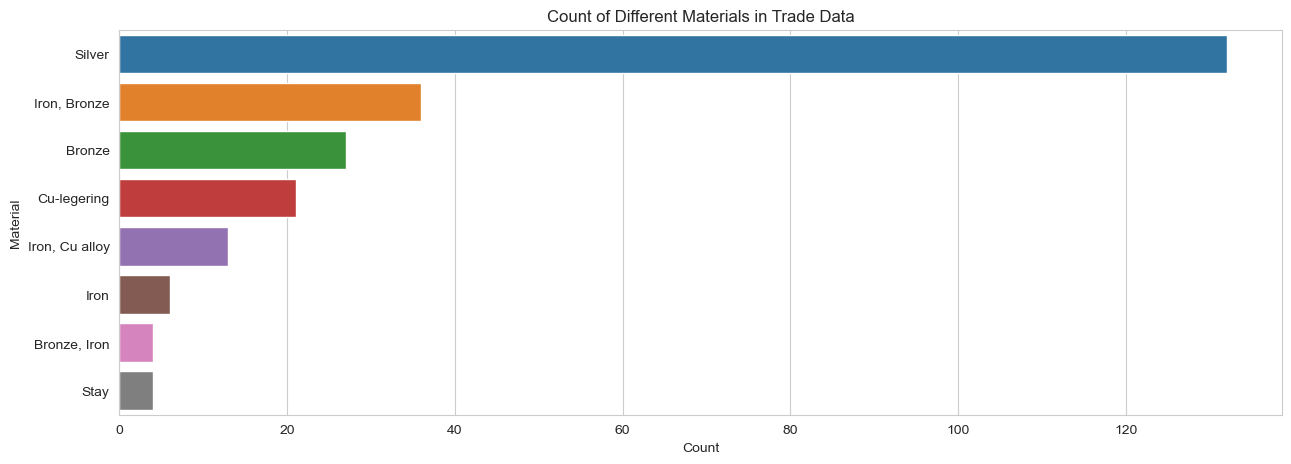

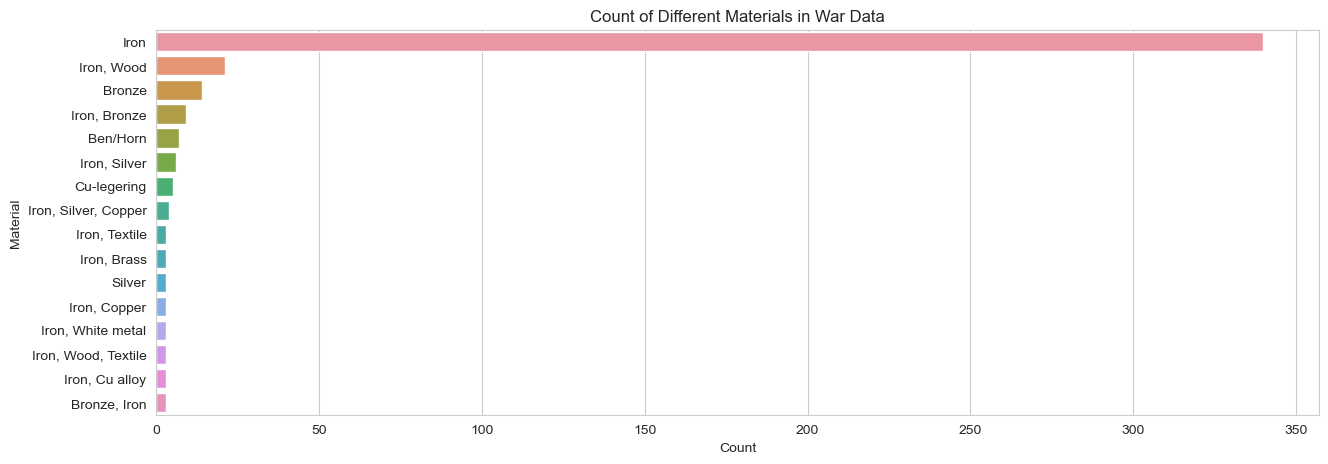

In [49]:
# Function to create plots with material frequency filtering
def create_filtered_plots(data, title, threshold):
    # Counting the occurrences of each material
    material_counts = data['Material_translated'].value_counts()

    # Identifying materials with count >= threshold
    materials_to_plot = material_counts[material_counts >= threshold].index

    # Filtering the data for plotting
    data_to_plot = data[data['Material_translated'].isin(materials_to_plot)]

    # Plotting
    plt.figure(figsize=(15, 5))
    sns.countplot(y=data_to_plot['Material_translated'], order=data_to_plot['Material_translated'].value_counts().index)
    plt.title(f'Count of Different Materials in {title}')
    plt.xlabel('Count')
    plt.ylabel('Material')
    plt.show()

# Creating plots for the Trade Data with filtered materials
create_filtered_plots(trade_df, 'Trade Data', threshold=3)

# Creating plots for the War Data with filtered materials
create_filtered_plots(war_df, 'War Data', threshold=3)

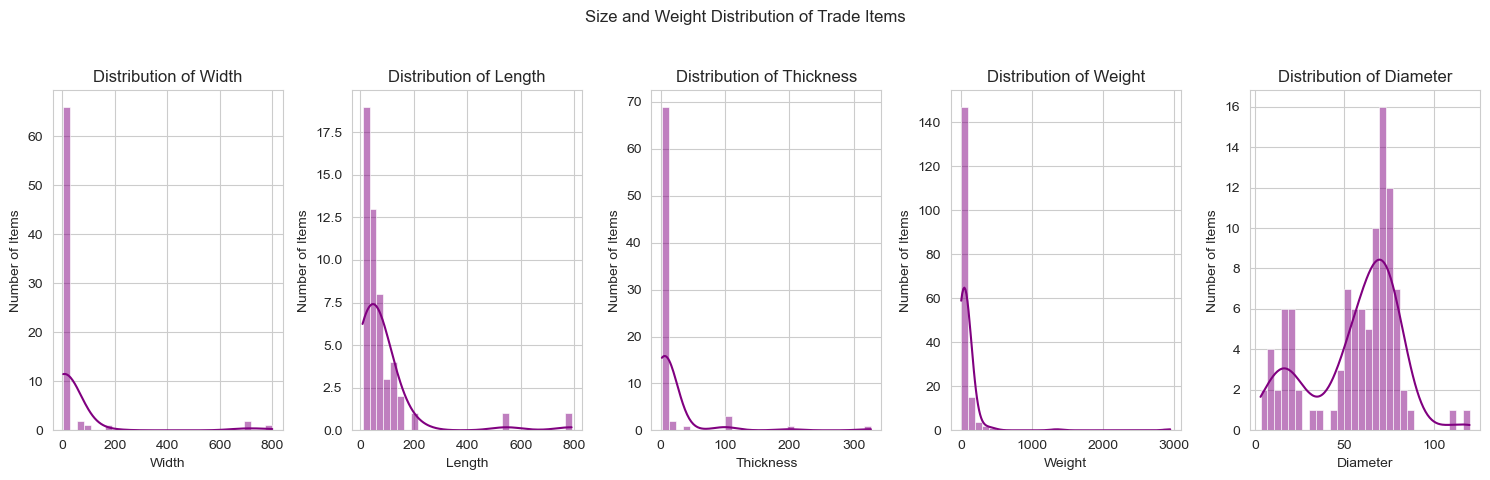

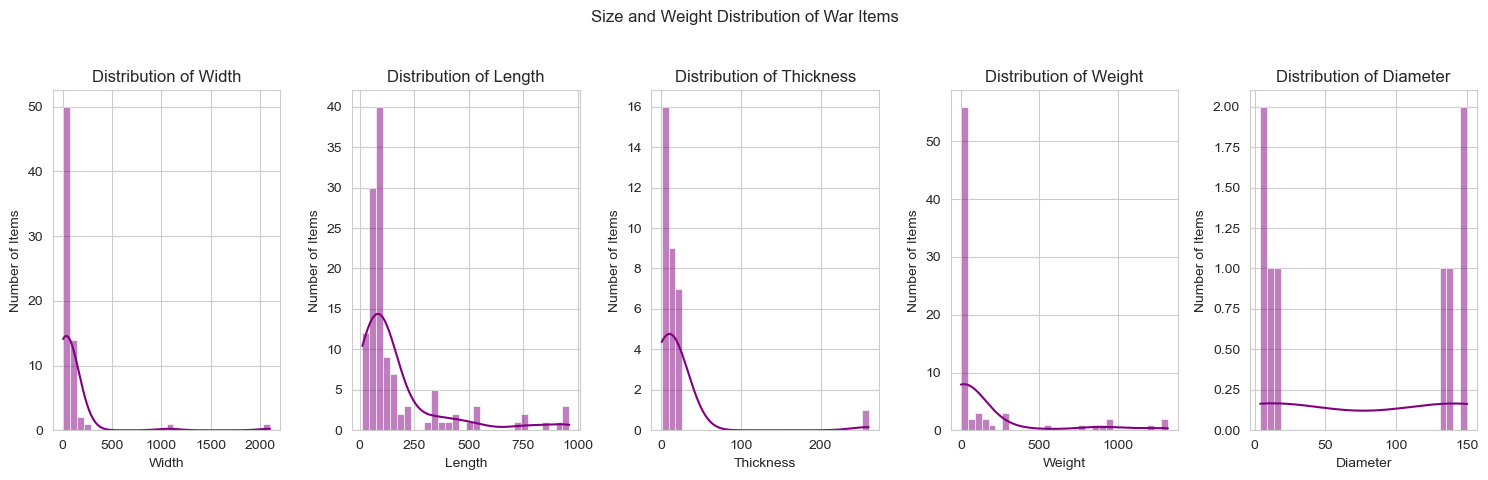

In [48]:
# Function to plot size and weight distribution
def plot_size_weight_distribution(df, columns, title):
    fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))
    fig.suptitle(title)

    for i, col in enumerate(columns):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='purple')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Number of Items')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Columns to analyze
size_weight_columns = ['Width', 'Length', 'Thickness', 'Weight', 'Diameter']

# Plotting size and weight distribution for both datasets
plot_size_weight_distribution(trade_df, size_weight_columns, 'Size and Weight Distribution of Trade Items')
plot_size_weight_distribution(war_df, size_weight_columns, 'Size and Weight Distribution of War Items')

